In [62]:
#Importacion de paquetes
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from collections import Counter

import scipy.special

sns.set_theme()

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [65]:
#    """"
 #   Aplica un top shuffle a un mazo de cartas
 #   """
 
def topShuffle(mazo):
    n = len(mazo)
    i = np.random.randint(n)
    mazo = np.insert(mazo, i, mazo[-1])[:-1]
    return mazo

In [66]:
#Toma un mazo de cartas en su posicion inicial y  le aplica
#un top shuffle k veces
def topShuffle_k(n,k):
    mazo=range(0,n)
    for i in range(k):
        mazo=topShuffle(mazo)
    return mazo

In [34]:
def iteracionesTopShuffle(n):
    """
    Retorna la cantidad de iteraciones del top shuffle necesarias para revolver un mazo de n cartas
    """
    mazo = np.arange(n)
    k = 0
    while mazo[-1] != 0:
        mazo = topShuffle(mazo)
        k += 1
    return k

In [35]:
def nlogn(n):
    return n*np.log(n)

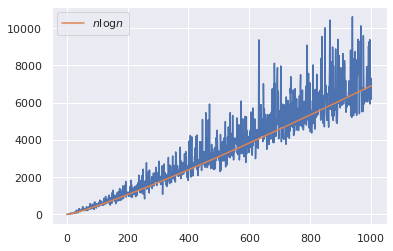

In [36]:
N = 1000

deck_size = np.arange(N)+1
iterations = np.zeros(N)
for i in range(N):
    iterations[i] = iteracionesTopShuffle(i+1)
    
plt.plot(deck_size, iterations)
plt.plot(deck_size, nlogn(deck_size), label=r"$n\log n$")
plt.legend()
plt.show()

In [67]:
#Toma dos medidas (sobre el mismo espacio discreta)
#y calcula su variacion total

def variacion_total(medida_1,medida_2):

    suma=0
    for i in range(len(medida_1)):
       # print( suma)
        suma+=np.abs(medida_1[i]-medida_2[i])
    return suma/2

In [68]:
#ejemplo de calculo de variacion total
medida_1=[0.1,0.9]
medida_2=[0.5,0.5]
print(variacion_total(medida_1,medida_2))

0.4


In [73]:
#funcion que calcula todas las permutaciones
#de {0,1,...,n-1}
def permutaciones(n):
    lista=range(0,n)
    return list(itertools.permutations(lista))

In [75]:
#ejemplo
print(permutaciones(4))


[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
#n es el numero de cartas, k cuantos shuffles
#se ocupan y r el numero de replicas
def  estimador_media(n,k,r):
    lista_1=permutaciones(n)
    instancias=list()
    for i in range(r):
        instancias.append(topShuffle_k(n,k))
    #return instancias
    conteo=np.zeros(np.math.factorial(n))
    
    for i in  range(len(lista_1)):
       # print(lista_1[i])
        suma=0
        for j in range(len(instancias)):
            if np.array_equal(instancias[j],lista_1[i]):
                suma+=1
        conteo[i]=suma
    return conteo/len(instancias)
def medida_uniforme(n):
    return np.ones(np.math.factorial(n))/np.math.factorial(n)

In [89]:
#generacion de graficos para top shuffle
n=7
uniforme=medida_uniforme(n)

In [95]:
#estimador_media(5,3)
errores=[]
for i in range(1,20):
    errores.append(variacion_total((estimador_media(7,i,15120)),uniforme))

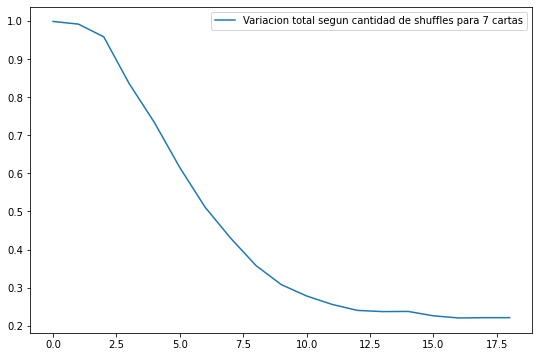

In [99]:
plt.figure(figsize=(9,6))
plt.plot(errores,label='Variacion total segun cantidad de shuffles para 7 cartas')
plt.legend()


# Modelo de urna de Ehrenfest

In [6]:
# Funcion que simula la transicion  de una cadena de Markov 
#desde el estado x hasta otro estado de la cadena.
#Para esto se implementa la funcion  f(x,u), que se demostro 
# que era una funcion de transicion
def Trans(x,u,P): 
    contador=1# contador
   # suma=sum(P[int(x)-1][:contador]) #suma de P_xy
    #print(x)
    while   sum(P[int(x)-1][:contador])<u :
        #suma+=P[int(x)][contador]
        contador+=1




    return  contador 



#funcion que simula $n$ transiciones de la cadena de markov
#homogena de distribucion inicial mu y  de  matriz de transicion P

def CM(u,mu,P):
    #Requeriremos n uniformes [0,1]
    contador=1
    suma=0
    while sum(mu[:contador])<u[0] :
        #suma+=mu[contador]
        contador+=1

    inicial=contador 

    cadena=np.zeros(len(u))
    cadena[0]=inicial
    for i in range(1,len(u)):
        cadena[i]=Trans(cadena[i-1],u[i],P)
    return cadena -1
         
def matriz_de_transicion(n):
    P = np.zeros((n+1,n+1))
    P[0, 0], P[0, 1] = 1/(n+1), n/(n+1)
    P[n, n], P[n, n-1] = 1/(n+1), n/(n+1)
    for i in range(1, n):
        P[i, i-1] = i/(n+1)
        P[i, i] = 1/(n+1)
        P[i, i+1] = (n-i)/(n+1)
    return P

In [100]:
#Funcion que modela una urna de Ehrenfest de tamaño n con k pasos
def Ehrenfest(n,k):
    mu=np.zeros(n+1)
    mu[0]=1
    matriz=matriz_de_transicion(n+1)
    uniformes=np.random.uniform(size=k)
    cadena=CM(uniformes,mu,matriz)
    return cadena

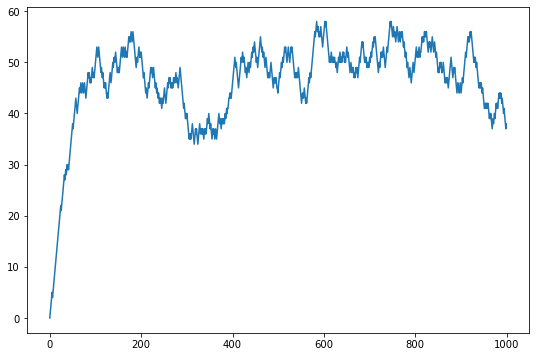

In [9]:
plt.figure(figsize=(9,6))
plt.plot(Ehrenfest(100, 1000))

In [ ]:
def estimador_medida_cadena(n,cadena):
    n=[i for i in range(n+1)]
    contador=[np.zeros(n+1)]
    for j in range(n):
        suma=0
        for i in range(len(cadena)):
            if cadena[i]==j:
                suma+=1
        contador[j]=suma

In [12]:
#Cuenta cuantas veces se repiten los elementos de [0,..n]
#en un array
#se usara para estimar la distribucion de la urna despues de k pasos
def contador(n,array):
    lista=Counter(array)
    contador=np.zeros(n+1)
    for j in range(n+1):
     #   print(lista[j])
        contador[j]=lista[j]
    return contador

In [110]:

def estimador_medida_cadena(n,cadena):
    contador=np.zeros(n+1)
    for j in range(n+1):
        suma=0
        for i in range(len(cadena)):
            if cadena[i]==j:
                suma+=1
        contador[j]=suma
    return contador/len(cadena)
def distribucion_invariante(n):
    array=np.zeros(n+1)
    for i in range(n+1):
        array[i]=scipy.special.binom(n,i)/2**n
    return array

In [108]:
estimador_medida_cadena(10,Ehrenfest(10,11))

array([0.09090909, 0.09090909, 0.27272727, 0.27272727, 0.18181818,
       0.09090909, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [36]:
#n numero de bolas de la urna
#k numero de veces en que ocurren cambios
#r numero de replicas por simulacion
#estima distribucion despues de  k pasos
def estimar_distribucion_cadena(n,k,r):
    valor_final=np.zeros(r+1)
    for i in range(r):
        valor_final[i]=Ehrenfest(n,k)[-1]
    return contador(n,valor_final)/r

In [111]:
c=estimar_distribucion_cadena(10,10,1000)
d=distribucion_invariante(10)

In [114]:
variacion_total(c,d)

0.14645312499999996

In [60]:
errores=[]
for i in range(1,100):
    c=estimar_distribucion_cadena(50,i,300)
    d=distribucion_invariante(51)
    errores.append(variacion_total(c,d))
    print(variacion_total(c,d))

1.001666666666666
1.0016666666666432
1.0016666666660772
1.001666666656829
1.0016666665458511
1.0016666655026816
1.0016666575048747
1.0016666060909682
1.0016663233113685
1.0016649722532809
1.0016592978179948
1.0016381477200462
1.0015676469508348
1.0013561449483896
1.00078206923878
0.9993660118206201
0.9961798863808133
0.9896202209360636
0.9772297216715384
0.9762868886459225
0.9605631144171514
0.9523760595894131
0.9294639217524175
0.9223761190016927
0.9079438757832253
0.8782138187188316
0.8779438757832253
0.840448242167031
0.8379452268413129
0.8171162598917853
0.7611416889525522
0.7937815755003642
0.7278040322333383
0.7438027257006088
0.7311360145085842
0.6771205832776657
0.6578097066773064
0.6204808545488655
0.5911430400106398
0.556465423317947
0.5746878753464182
0.5770770205480504
0.5444975235442177
0.5071038451922631
0.46187604667182963
0.4604371785255963
0.430507679193078
0.45405251452885653
0.4247090255466628
0.40738017341822186
0.41048652899283355
0.3773858478621898
0.3785483877824

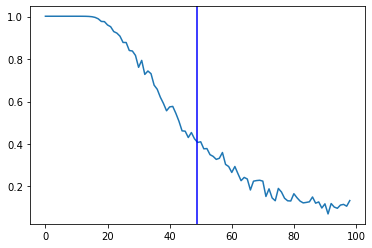

In [61]:
plt.plot(errores)
plt.axvline(x=0.25*50*np.log(50),ymin=0,ymax=1 , color='b')

In [22]:
variacion_total(c,d)

0.15196484375000002

array([0.002, 0.026, 0.069, 0.191, 0.215, 0.287, 0.121, 0.084, 0.002,
       0.004, 0.   ])

In [ ]:

variacion_tita

In [ ]:
for k in o                        

In [ ]:
medida_uniforme=np.zeros(1000)
for i in range(1000):
    medida_uniforme[i]=scipy.special.binom(1000,i)/2**(1000)

In [ ]:
medida_uniforme

In [ ]:

#array=[]
for i in range(1501,1):
    array.append(variacion_total(medida_uniforme,errores[i]))
    print(array[i-1])

In [ ]:
plt.plot(array)

In [ ]:
def rising(P):
    """
    Dada una permutación P, calcula la cantidad de rising sequences
    """
    rising_seq = []
    while len(P) != 0:
        n = len(P)
        sub_list = []
        actual = P[0]
        sub_list.append(actual)
        for i in range(n):
            if P[i] == actual+1:
                actual = P[i]
                sub_list.append(actual)
        P = [x for x in P if x not in sub_list]
        rising_seq.append(sub_list)
    return len(rising_seq)

def GSRdist(n, m, P):
    """
    Retorna la probabilidad de que el mazo esté en la permutación P luego de aplicar un riffle shuffle m veces
    en un mazo de largo n
    """
    return scipy.special.binom(2**m+n-rising(P), n)/(2**(m*n))

A = [1, 2, 3, 4, 5]
GSRdist(5, 1, A)